In [1]:
pip install cartopy cmocean

Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotting_functions as pf
import xarray as xr
import cmocean
import numpy as np


ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [3]:
min_lonGS = -82
min_latGS = 25
max_lonGS = -50
max_latGS = 43

In [4]:
clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_20180101-20180101_tos.zarr"
ds = xr.open_dataset(clf,engine='zarr')
mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)
dsGS = ds.where(mask_lon & mask_lat, drop=True)
meanSST=dsGS.tos.mean(dim='time_counter')
data=meanSST

In [5]:
for m in np.arange(1,4):
    print("month"+str(m))
    
    if m == 1:
        t0=2
    else:
        t0=1
    if m == 1 or m == 3:
        tf=31
    else:
        tf=28
    
    for t in np.arange(t0,tf+1):
        print("day"+str(t))
        tt=str(t).zfill(2)
        mm=str(m).zfill(2)
        clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_2018"+mm+tt+"-2018"+mm+tt+"_tos.zarr"
        ds = xr.open_dataset(clf,engine='zarr')
        mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
        mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)
        dsGS = ds.where(mask_lon & mask_lat, drop=True)
        meanSST=dsGS.tos.mean(dim='time_counter')
        data=xr.concat([data, meanSST], dim="time_counter")

month1
day2
day3
day4
day5
day6
day7
day8
day9
day10
day11
day12
day13
day14
day15
day16
day17
day18
day19
day20
day21
day22
day23
day24
day25
day26
day27
day28
day29
day30
month2
day1
day2
day3
day4
day5
day6
day7
day8
day9
day10
day11
day12
day13
day14
day15
day16
day17
day18
day19
day20
day21
day22
day23
day24
day25
day26
day27
month3
day1
day2
day3
day4
day5
day6
day7
day8
day9
day10
day11
day12
day13
day14
day15
day16
day17
day18
day19
day20
day21
day22
day23
day24
day25
day26
day27
day28
day29
day30


In [6]:
data

<xarray.DataArray 'tos' (time_counter: 87, y: 843, x: 1160)> Size: 340MB
array([[[23.175446, 23.192123, 23.208899, ...,       nan,       nan,
               nan],
        [23.150415, 23.163755, 23.177689, ...,       nan,       nan,
               nan],
        [23.126478, 23.136328, 23.146982, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[23.098818, 23.09907 , 23.099579, ...,       nan,       nan,
               nan],
        [23.080462, 23.078133, 23.075838, ...,       nan,       nan,
               nan],
        [23.061935, 23.057951, 23.053728, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[22.600153, 22.572214, 22.543823, ...,       nan,       nan,
               nan],
        [22.553741, 22.521048, 22.488653, ...,       nan,       nan,
               nan],
        [22.49941 , 22.464174, 22.429918, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 4MB 25.01 25.01 25.01 25.01 ... 44.04 44.04 44.04
    nav_lon  (y, x) float32 4MB -81.97 -81.94 -81.92 ... -50.12 -50.09 -50.06
Dimensions without coordinates: time_counter, y, x

In [1]:
dataset=data.to_dataset(name='daily_mean_sst_GS')

NameError: name 'data' is not defined

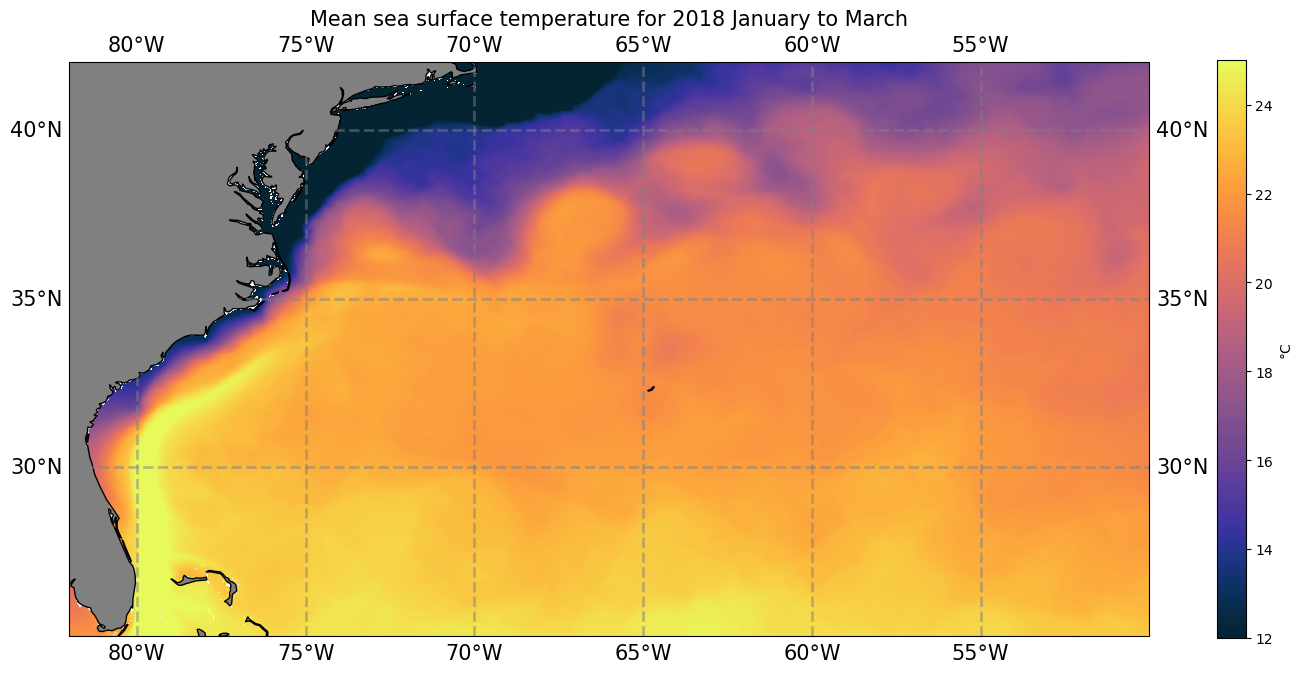

In [9]:
pf.map_mean_GS_ORCA36(data.mean( dim='time_counter'),data.nav_lon,data.nav_lat,'Mean sea surface temperature for 2018 January to March', '°C', 12, 25, cmocean.cm.thermal,"ORCA36_SST_GS_201801-03.png")

